## Brooke Johnson
#### Assignment: Lab 2

MSDS 598 Spring 2022

2/14/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df_penguins = sns.load_dataset('penguins')
df_penguins.dropna(inplace=True)
df_penguins['is_male'] = df_penguins['sex'].apply(lambda x : int(x == 'Male'))

1. Create a scatter plot with flipper length on the x-axis and body mass on the y-axis. Color the points according to the penguin's sex.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

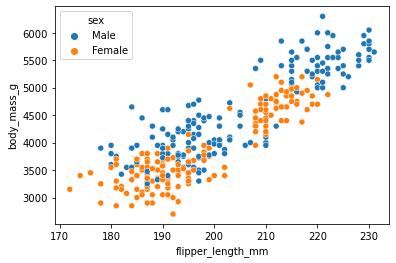

In [3]:
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df_penguins, hue='sex')

2. Find the line of best fit for the penguins dataset to predict body mass from flipper length. Plot this on the plot from Q1.

In [4]:
model = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_penguins)
res = model.fit()
#res.summary()

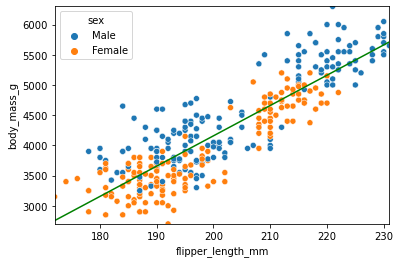

In [5]:
b, m = res.params

# plot the points
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df_penguins, hue='sex')

# plot the line
plt.axline((0, b), slope=m, color='green')

# set limits of the axes (need to do this because we specified the y-int)
plt.xlim(min(df_penguins['flipper_length_mm']), max(df_penguins['flipper_length_mm']))
plt.ylim(min(df_penguins['body_mass_g']), max(df_penguins['body_mass_g']))
plt.show()


3. Find two lines of best fit: one for the male and one for the female penguins. Plot this on the plot from Q1.

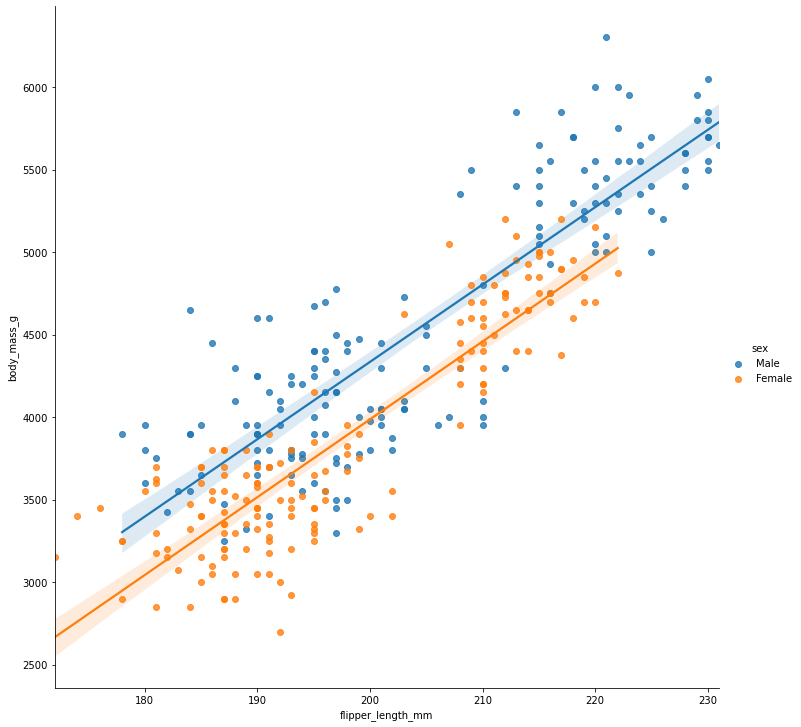

In [6]:
# solution 1:
sns.lmplot(x="flipper_length_mm", 
           y="body_mass_g", 
           hue="sex",
           data=df_penguins,
           height=10)
# code from: https://datavizpyr.com/add-regression-line-per-group-with-seaborn-in-python/

In [7]:
# solution 2: 
df_male = df_penguins[df_penguins['is_male']==1]
df_female = df_penguins[df_penguins['is_male']==0]

In [8]:
model2 = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_male)
resm = model2.fit()
#resm.summary()

model3 = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_female)
resf = model3.fit()
#resf.summary()

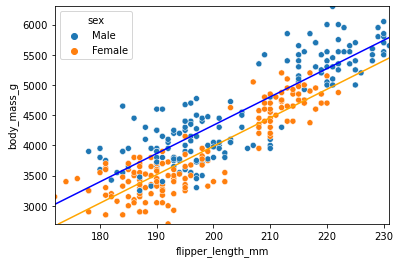

In [9]:
b, m = resm.params

c, n = resf.params

# plot the points
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df_penguins, hue='sex')

# plot the line
plt.axline((0, b), slope=m, color='blue')
plt.axline((0, c), slope=n, color='orange')

# set limits of the axes (need to do this because we specified the y-int)
plt.xlim(min(df_penguins['flipper_length_mm']), max(df_penguins['flipper_length_mm']))
plt.ylim(min(df_penguins['body_mass_g']), max(df_penguins['body_mass_g']))
plt.show()

4. Take the line of best fit from above which used both flipper length and ```is_male```. Plot this line with $X_{is\_male}=0$ and with $X_{is\_male}=1$. What do you notice?

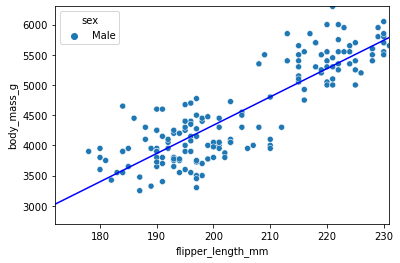

In [10]:
b, m = resm.params

# plot the points
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df_male, hue='sex')

# plot the line
plt.axline((0, b), slope=m, color='blue')

# set limits of the axes (need to do this because we specified the y-int)
plt.xlim(min(df_penguins['flipper_length_mm']), max(df_penguins['flipper_length_mm']))
plt.ylim(min(df_penguins['body_mass_g']), max(df_penguins['body_mass_g']))
plt.show()


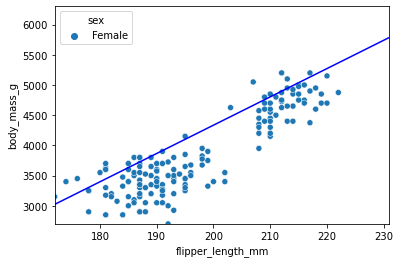

In [11]:
b, m = resm.params

# plot the points
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df_female, hue='sex')

# plot the line
plt.axline((0, b), slope=m, color='blue')

# set limits of the axes (need to do this because we specified the y-int)
plt.xlim(min(df_penguins['flipper_length_mm']), max(df_penguins['flipper_length_mm']))
plt.ylim(min(df_penguins['body_mass_g']), max(df_penguins['body_mass_g']))
plt.show()

The line is a better fit for the group where x_ismale = 1 because the intercepts for the two groups are different even though the slopes are the same. 